In [1]:
%load_ext autoreload
%autoreload 2
    
import torch
import torch.nn as nn
import sys, os
from time import time

sys.path.append(os.path.dirname('../ml/.'))
from activates import get_activate
from transformers_models.modules import UpSampleModule, DownSampleModule, ConvModule
from models.HessNet import HessBlock, HessFeatures, HessNet
from utils import get_total_params

In [2]:
x = torch.randn(1, 1, 64, 64, 64)
up1 = UdSampleModule(mode='conv', in_channels=1)
up2 = UdSampleModule()
print(up1(x).shape)
print(up2(x).shape)

torch.Size([1, 1, 128, 128, 128])
torch.Size([1, 1, 128, 128, 128])


In [4]:
x = torch.randn(1, 1, 64, 64, 64)

down1 = DownSampleModule(mode='conv', in_channels=1, dilation=1,
                        norm='layer_norm', layer_norm_shape=[32, 32])
down2 = DownSampleModule(mode='avg_pool')
down3 = DownSampleModule(mode='max_pool')
print(down1(x).shape)
print(down2(x).shape)
print(down3(x).shape)

torch.Size([1, 1, 32, 32, 32])
torch.Size([1, 1, 32, 32, 32])
torch.Size([1, 1, 32, 32, 32])


In [6]:
x = torch.randn(1, 1, 64, 64, 64)
m = ConvModule(in_channels=1,
               out_channels=1,
               kernel_size=7,
               stride=2,
               dilation=2,
               dim=3,
               norm='batch_norm',
               act='relu',)
m(x).shape

torch.Size([1, 1, 32, 32, 32])

In [14]:
DEVICE = 'cuda'
x = torch.randn(16, 1, 64, 64, 64).to(DEVICE)
m = HessNet(in_channels=1,
            out_channels=1,
            device=DEVICE)

print(get_total_params(m))
m(x).shape

1479


torch.Size([16, 1, 64, 64, 64])

In [10]:
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt

(4418, 4573)


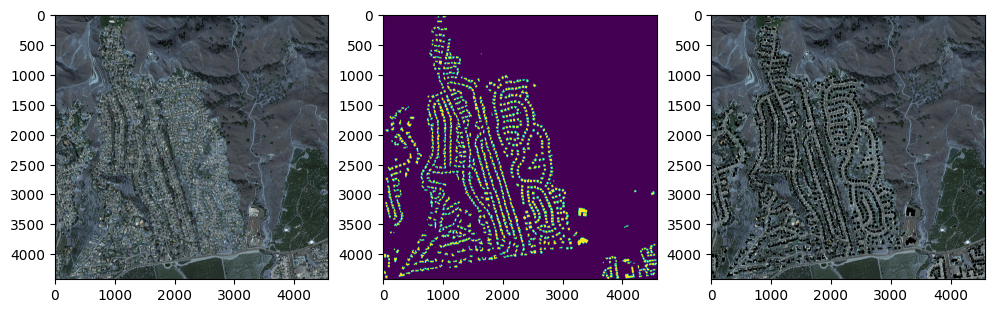

In [38]:
loc = 'ventura' #'santa_rosa'

GT = tf.imread(f'/home/msst/Documents/datasets/domiki/{loc}/all.tif')
print(GT.shape)

img_R = tf.imread(f'/home/msst/Documents/datasets/domiki/{loc}/BLUE.tif')
img_G = tf.imread(f'/home/msst/Documents/datasets/domiki/{loc}/GRN.tif')
img_B = tf.imread(f'/home/msst/Documents/datasets/domiki/{loc}/RED.tif')

img = np.stack([img_R, img_G, img_B], axis=0)

masked = img*(1-GT)
img = np.transpose(img, axes=[1, 2, 0])
masked = np.transpose(masked, axes=[1, 2, 0])


fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0][0].imshow(img)
ax[0][1].imshow(GT)
ax[0][2].imshow(masked)


s1, s2 = 4418, 4573
ax[0].imshow(img[s1:s2, s1:s2])
ax[1].imshow(GT[s1:s2, s1:s2])
ax[2].imshow(masked[s1:s2, s1:s2])
